# Regional Collaboration Analysis

Comparative analysis of human-AI collaboration patterns across global regions, focusing on how users interact with Claude for different types of assistance.

In [5]:
# Install and import required packages
import subprocess
import sys

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn']

for package in packages:
    try:
        __import__(package)
        print(f"✓ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

print("Package installation complete!")

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style (consistent with Software Request Analysis)
plt.style.use('default')
sns.set_palette("husl")

# Load the collaboration analysis dataset
df = pd.read_csv('regional_collaboration_analysis.csv')

print(f"Dataset shape: {df.shape}")
print(f"Available regions: {sorted(df['region'].unique())}")
print(f"Available variables: {sorted(df['variable'].unique())}")
print(f"Collaboration patterns: {sorted(df[df['variable'] == 'collaboration_count']['cluster_name'].unique())}")

✓ pandas already installed
✓ numpy already installed
✓ matplotlib already installed
✓ seaborn already installed
Package installation complete!
Dataset shape: (73, 6)
Available regions: ['APAC', 'Europe', 'Latin America', 'Middle East & Africa', 'North America', 'Unknown']
Available variables: ['collaboration_count', 'collaboration_pct']
Collaboration patterns: ['directive', 'feedback loop', 'learning', 'none', 'not_classified', 'task iteration', 'validation']


## Data Overview

This analysis examines collaboration patterns across **6 global regions** using **7 distinct collaboration types**. The data is sourced from raw country-level usage data (claude.csv) and aggregated by region with accurate percentage calculations.

**Key Research Question**: How do human-AI collaboration patterns vary across different global regions, and what do these patterns reveal about regional user behavior and preferences?

## Regional Collaboration Patterns Comparison

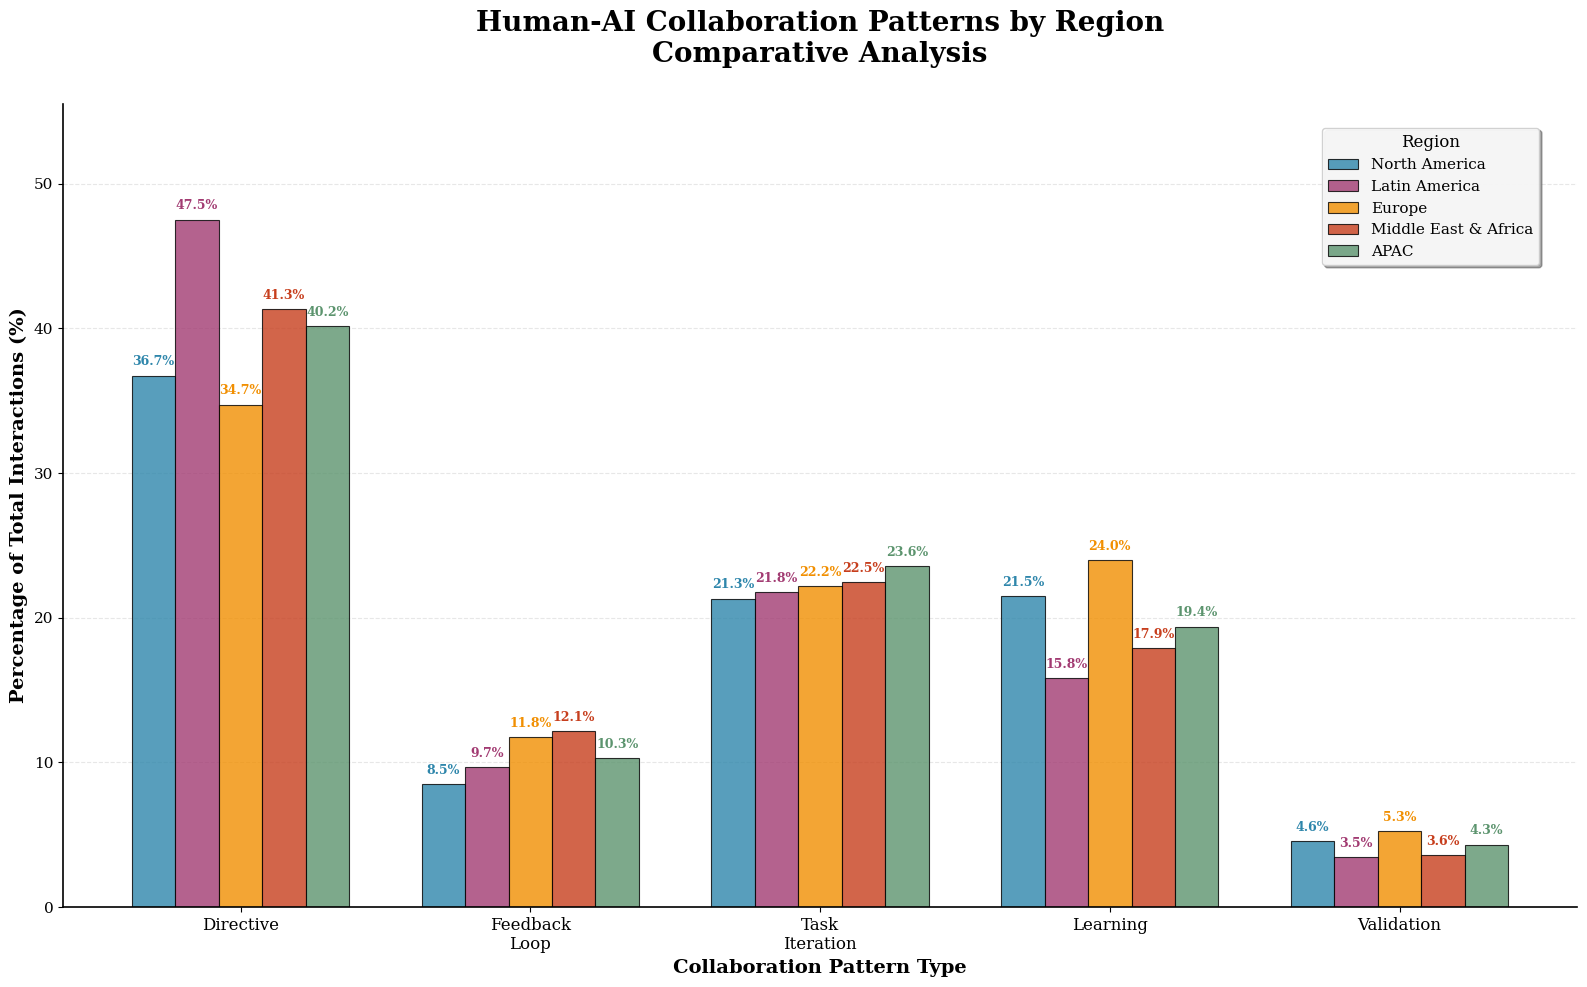


📊 REGIONAL COLLABORATION PATTERNS COMPARISON
Pattern         N. America   Latin Am.    Europe       MEA          APAC        
----------------------------------------------------------------------------------------------------
Directive            36.7%        47.5%        34.7%        41.3%        40.2%  
Feedback Loop         8.5%         9.7%        11.8%        12.1%        10.3%  
Task Iteration       21.3%        21.8%        22.2%        22.5%        23.6%  
Learning             21.5%        15.8%        24.0%        17.9%        19.4%  
Validation            4.6%         3.5%         5.3%         3.6%         4.3%  

🔍 Key Regional Observations:
• Directive pattern: Most dominant collaboration type across all regions
• Task Iteration: Strong secondary pattern in most regions
• Learning: Significant regional variation in educational collaboration
• Regional preferences suggest different user sophistication and needs


In [6]:
# Regional Collaboration Patterns Comparison
# Set custom font and style (consistent with Software Request Analysis)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11

# Define regions and colors (exact match with Software Request Analysis)
regions = ['North America', 'Latin America', 'Europe', 'Middle East & Africa', 'APAC']
regional_colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#5C946E']  # Exact same colors

# Define collaboration patterns in logical order (excluding not_classified)
collaboration_order = [
    'directive',
    'feedback loop',
    'task iteration', 
    'learning',
    'validation'
]

collaboration_labels = [
    'Directive',
    'Feedback\nLoop',
    'Task\nIteration',
    'Learning', 
    'Validation'
]

# Collect data for all regions
regional_data = {}
for region in regions:
    region_pct = df[(df['region'] == region) & (df['variable'] == 'collaboration_pct')]
    
    percentages = []
    for pattern in collaboration_order:
        pattern_pct = region_pct[region_pct['cluster_name'] == pattern]['value'].values
        percentage = float(pattern_pct[0]) if len(pattern_pct) > 0 else 0.0
        percentages.append(percentage)
    
    regional_data[region] = percentages

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(16, 10))

# Set up bar positions
x = np.arange(len(collaboration_labels))
width = 0.15  # Width of each bar
bar_positions = []

# Calculate positions for each region
for i, region in enumerate(regions):
    positions = x + (i - 2) * width  # Center the bars around x
    bar_positions.append(positions)

# Plot bars for each region
bars = []
for i, region in enumerate(regions):
    bars.append(ax.bar(bar_positions[i], regional_data[region], width, 
                      label=region, color=regional_colors[i], 
                      edgecolor='black', linewidth=0.8, alpha=0.8))

# Customize the chart
ax.set_title('Human-AI Collaboration Patterns by Region\nComparative Analysis', 
             fontsize=20, fontweight='bold', pad=30, family='serif')
ax.set_xlabel('Collaboration Pattern Type', fontsize=14, fontweight='bold', family='serif')
ax.set_ylabel('Percentage of Total Interactions (%)', fontsize=14, fontweight='bold', family='serif')

# Set x-axis
ax.set_xticks(x)
ax.set_xticklabels(collaboration_labels, fontsize=12, family='serif')
ax.tick_params(axis='y', labelsize=11)

# Add grid for easier reading
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Add percentage labels on top of bars
for i, region in enumerate(regions):
    for j, percentage in enumerate(regional_data[region]):
        height = percentage
        ax.text(bar_positions[i][j], height + 0.5, f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9, fontweight='bold',
                color=regional_colors[i], family='serif')

# Add legend positioned on the right side
legend = ax.legend(title='Region', loc='upper right', frameon=True,
                  fancybox=True, shadow=True, fontsize=11, title_fontsize=12,
                  bbox_to_anchor=(0.98, 0.98))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.9)

# Style the frame
for spine in ax.spines.values():
    spine.set_linewidth(1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis limit for better visualization (extra space for percentage labels)
max_percentage = max([max(percentages) for percentages in regional_data.values()])
ax.set_ylim(0, max_percentage + 8)

plt.tight_layout()
plt.show()

# Print detailed comparison table
print(f"\n{'='*100}")
print(f"📊 REGIONAL COLLABORATION PATTERNS COMPARISON")
print(f"{'='*100}")
print(f"{'Pattern':<15} {'N. America':<12} {'Latin Am.':<12} {'Europe':<12} {'MEA':<12} {'APAC':<12}")
print("-" * 100)

for i, pattern in enumerate(collaboration_labels):
    pattern_clean = pattern.replace('\n', ' ')
    row = f"{pattern_clean:<15}"
    for region in regions:
        percentage = regional_data[region][i]
        row += f"{percentage:>10.1f}%  "
    print(row)

print(f"\n🔍 Key Regional Observations:")
print(f"• Directive pattern: Most dominant collaboration type across all regions")
print(f"• Task Iteration: Strong secondary pattern in most regions")
print(f"• Learning: Significant regional variation in educational collaboration")
print(f"• Regional preferences suggest different user sophistication and needs")
print(f"{'='*100}")

## Regional Collaboration Profiles Summary

In [7]:
# Regional Collaboration Profiles - Top 3 Patterns per Region
print("🌍 REGIONAL COLLABORATION PROFILES")
print("=" * 70)

# Create summary for each region
for region in regions:
    print(f"\n📍 {region.upper()}:")
    
    # Get percentage data for this region (excluding not_classified)
    region_pct = df[(df['region'] == region) & 
                   (df['variable'] == 'collaboration_pct') & 
                   (df['cluster_name'] != 'not_classified')]
    
    # Sort by percentage and get top 3
    region_sorted = region_pct.sort_values('value', ascending=False).head(3)
    
    for i, (_, row) in enumerate(region_sorted.iterrows(), 1):
        pattern = row['cluster_name'].title().replace('_', ' ')
        percentage = row['value']
        print(f"  {i}. {pattern}: {percentage:.1f}%")

print(f"\n📊 COLLABORATION PATTERN DEFINITIONS:")
print("-" * 70)
print("• Directive: Direct task completion requests")
print("• Task Iteration: Iterative refinement and improvement processes")
print("• Learning: Educational assistance and tutorial requests")
print("• Feedback Loop: Review, critique, and improvement cycles")
print("• Validation: Verification and accuracy checking requests")
print("• None: No specific collaboration pattern identified")
print("=" * 70)

🌍 REGIONAL COLLABORATION PROFILES

📍 NORTH AMERICA:
  1. Directive: 36.7%
  2. Learning: 21.5%
  3. Task Iteration: 21.3%

📍 LATIN AMERICA:
  1. Directive: 47.5%
  2. Task Iteration: 21.8%
  3. Learning: 15.8%

📍 EUROPE:
  1. Directive: 34.7%
  2. Learning: 24.0%
  3. Task Iteration: 22.2%

📍 MIDDLE EAST & AFRICA:
  1. Directive: 41.3%
  2. Task Iteration: 22.5%
  3. Learning: 17.9%

📍 APAC:
  1. Directive: 40.2%
  2. Task Iteration: 23.6%
  3. Learning: 19.4%

📊 COLLABORATION PATTERN DEFINITIONS:
----------------------------------------------------------------------
• Directive: Direct task completion requests
• Task Iteration: Iterative refinement and improvement processes
• Learning: Educational assistance and tutorial requests
• Feedback Loop: Review, critique, and improvement cycles
• Validation: Verification and accuracy checking requests
• None: No specific collaboration pattern identified


## Strategic Insights

### Key Regional Patterns

**[INSERT KEY REGIONAL INSIGHTS HERE]**

_Example areas to explore:_
- _Which regions show the highest directive vs. learning collaboration ratios?_
- _How do collaboration patterns correlate with software development complexity preferences?_
- _What do regional differences suggest about user maturity and needs?_

### Business and Product Implications

**[INSERT BUSINESS IMPLICATIONS HERE]**

_Consider implications for:_
- _Regional product development and feature prioritization_
- _Marketing messaging and positioning strategies_
- _User onboarding and education programs_
- _Enterprise growth opportunities by region_

### Alignment with Software Development Patterns

**[INSERT ALIGNMENT WITH SOFTWARE PATTERNS HERE]**

_Cross-reference with Software Request Analysis findings:_
- _Do regions with high learning collaboration also show different SDLC stage preferences?_
- _How do collaboration patterns correlate with software complexity adoption?_
- _What does this suggest about regional developer ecosystem maturity?_

### Strategic Recommendations

**[INSERT STRATEGIC RECOMMENDATIONS HERE]**

_Potential focus areas:_
- _Region-specific feature development priorities_
- _Educational content and tutorial strategies_
- _Enterprise engagement approaches by collaboration preference_
- _Cross-regional best practice sharing opportunities_